# Predicting NIFTY 50 USING LSTM MODEL

## The Nifty is the flagship benchmark of the National Stock Exchange (NSE), which is a well-diversified index, comprising top 50 companies in terms of free-float market capitalisation that are traded on the bourse. It is supposed to reflect the health of the listed universe of Indian companies, and hence the broader economy, in all market conditions

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
!pip install nsepy

You should consider upgrading via the 'c:\users\himanshuu\anaconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36088 sha256=4fd3f72f4ca2d711ab4e01296bf34c16fb7a8112e1f656b154cac61e5f7099cb
  Stored in directory: c:\users\himanshuu\appdata\local\pip\cache\wheels\b9\2c\cb\d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


In [3]:
from nsepy import get_history
from datetime import date
data=get_history(symbol="NIFTY",start=date(2016,9,15),end=date(2021,9,17),index=True)

In [5]:
data.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2016-09-15,8743.85,8751.95,8704.35,8742.55,149889703,7.347340e+10
2016-09-16,8780.85,8847.65,8750.50,8779.85,274039556,1.443063e+11
2016-09-19,8788.45,8824.30,8774.20,8808.40,135814177,7.364640e+10
2016-09-20,8816.10,8816.45,8759.30,8775.90,140718486,7.035070e+10
2016-09-21,8790.30,8826.85,8757.30,8777.15,153441330,7.572410e+10


In [6]:
data.shape

(1241, 6)

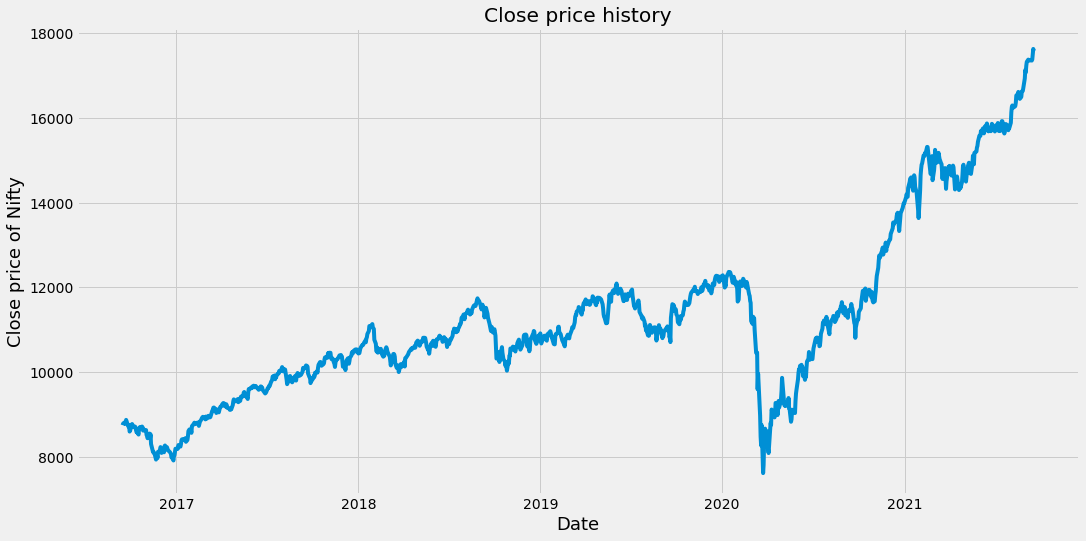

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(data["Close"])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price of Nifty',fontsize=18)
plt.show()

In [8]:
close=data.filter(["Close"])

In [10]:
dataset=close.values

In [11]:
print(dataset)

[[ 8742.55]
 [ 8779.85]
 [ 8808.4 ]
 ...
 [17519.45]
 [17629.5 ]
 [17585.15]]


In [12]:
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

993

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [14]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.11301245, 0.11673528, 0.1195848 , 0.11634104, 0.1164658 ,
       0.12547845, 0.12189535, 0.1110662 , 0.1094044 , 0.11327195,
       0.09791152, 0.0998977 , 0.11256831, 0.11566734, 0.11315218,
       0.10971879, 0.10852609, 0.10964394, 0.09612496, 0.09712803,
       0.09084013, 0.10655987, 0.10468348, 0.10870574, 0.10807196,
       0.10965891, 0.1078973 , 0.10030691, 0.10030691, 0.10257754,
       0.1013499 , 0.1014048 , 0.09020136, 0.08730194, 0.08219178,
       0.08850962, 0.09315068, 0.08201712, 0.0913741 , 0.06847319,
       0.04972428, 0.05003868, 0.04687976, 0.04629588, 0.03182374,
       0.03912968, 0.04222372, 0.03545675, 0.05030816, 0.05156574,
       0.05308781, 0.06130698, 0.05815306, 0.04756344, 0.05175038,
       0.05318761, 0.04908551, 0.06353769, 0.06502483, 0.0559473 ])]
[0.0610375028070963]

[array([0.11301245, 0.11673528, 0.1195848 , 0.11634104, 0.1164658 ,
       0.12547845, 0.12189535, 0.1110662 , 0.1094044 , 0.11327195,
       0.09791152, 0.0998977 , 0.112

In [15]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [17]:
x_train.shape

(933, 60, 1)

In [18]:
x_train

array([[[0.11301245],
        [0.11673528],
        [0.1195848 ],
        ...,
        [0.06353769],
        [0.06502483],
        [0.0559473 ]],

       [[0.11673528],
        [0.1195848 ],
        [0.11634104],
        ...,
        [0.06502483],
        [0.0559473 ],
        [0.0610375 ]],

       [[0.1195848 ],
        [0.11634104],
        [0.1164658 ],
        ...,
        [0.0559473 ],
        [0.0610375 ],
        [0.05711006]],

       ...,

       [[0.28552536],
        [0.2689872 ],
        [0.26735035],
        ...,
        [0.38316241],
        [0.38467949],
        [0.38224418]],

       [[0.2689872 ],
        [0.26735035],
        [0.27674227],
        ...,
        [0.38467949],
        [0.38224418],
        [0.39040347]],

       [[0.26735035],
        [0.27674227],
        [0.26969584],
        ...,
        [0.38224418],
        [0.39040347],
        [0.39866257]]])

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [21]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

933/933 [==============================] - 15s 13ms/step - loss: 0.0030


In [22]:
test_data=scaled_data[training_data_len-60:,:]

In [37]:
test_data=scaled_data[training_data_len-60:,:]
#create the data sets x_test,y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [38]:
x_test=np.array(x_test)

In [39]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [40]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [41]:
from sklearn.metrics import r2_score
print(f"Accuracy:-{r2_score(predictions,y_test)}")
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

Accuracy:-0.9435357114171068


243.09760427167336

In [42]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]

In [43]:
print(valid)

                Open      High       Low     Close     Volume      Turnover
Date                                                                       
2020-09-18  11584.10  11584.10  11446.10  11504.95  764154094  4.869868e+11
2020-09-21  11503.80  11535.25  11218.50  11250.55  602851737  3.721323e+11
2020-09-22  11301.75  11302.20  11084.65  11153.65  672249921  3.629649e+11
2020-09-23  11258.75  11259.55  11024.40  11131.85  714925847  3.554298e+11
2020-09-24  11011.00  11015.30  10790.20  10805.55  706139506  3.362371e+11
...              ...       ...       ...       ...        ...           ...
2021-09-13  17363.55  17378.35  17269.15  17355.30  241053924  1.849863e+11
2021-09-14  17420.35  17438.55  17367.05  17380.00  230354386  1.870282e+11
2021-09-15  17387.65  17532.70  17386.90  17519.45  388191629  2.425680e+11
2021-09-16  17539.20  17644.60  17510.45  17629.50  503310763  3.018977e+11
2021-09-17  17709.65  17792.95  17537.65  17585.15  508285916  4.334558e+11

[248 rows x

In [44]:
print(len(x_test))
print(len(predictions))
valid["Predictions"]=predictions

248
248


<ipython-input-44-16e0f5464fdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"]=predictions


In [48]:
print(predictions)
print(valid)

[[11522.427 ]
 [11542.247 ]
 [11523.483 ]
 [11474.5625]
 [11412.518 ]
 [11311.018 ]
 [11231.143 ]
 [11193.993 ]
 [11184.311 ]
 [11194.569 ]
 [11235.636 ]
 [11299.191 ]
 [11387.012 ]
 [11486.612 ]
 [11592.11  ]
 [11697.263 ]
 [11790.697 ]
 [11865.939 ]
 [11925.685 ]
 [11932.217 ]
 [11919.14  ]
 [11909.583 ]
 [11905.175 ]
 [11908.821 ]
 [11910.902 ]
 [11916.091 ]
 [11901.77  ]
 [11894.241 ]
 [11870.94  ]
 [11835.202 ]
 [11793.805 ]
 [11758.017 ]
 [11747.87  ]
 [11764.798 ]
 [11821.105 ]
 [11909.799 ]
 [12030.069 ]
 [12173.812 ]
 [12326.965 ]
 [12457.987 ]
 [12563.779 ]
 [12649.142 ]
 [12723.371 ]
 [12788.977 ]
 [12818.83  ]
 [12836.375 ]
 [12852.271 ]
 [12880.8545]
 [12886.169 ]
 [12895.219 ]
 [12901.776 ]
 [12924.174 ]
 [12952.222 ]
 [12982.404 ]
 [13026.011 ]
 [13083.473 ]
 [13145.625 ]
 [13220.031 ]
 [13284.184 ]
 [13339.276 ]
 [13387.639 ]
 [13426.773 ]
 [13470.51  ]
 [13517.757 ]
 [13562.809 ]
 [13543.323 ]
 [13511.286 ]
 [13492.835 ]
 [13502.73  ]
 [13542.423 ]
 [13600.625 ]
 [1366

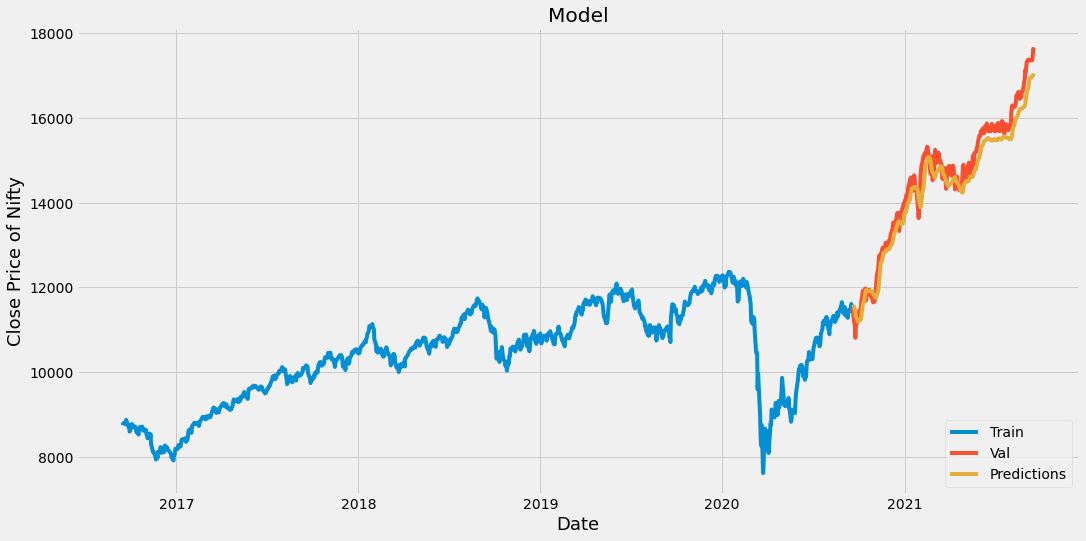

In [46]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price of Nifty',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[["Close","Predictions"]])
plt.legend(['Train',"Val","Predictions"],loc="lower right")

In [51]:
nifty_quote = get_history(symbol="NIFTY", start=date(2016,9,15), end=date(2021,9,17),index=True)

In [52]:
new_df=nifty_quote.filter(['Close'])

In [53]:
last_60_days=new_df[-60:].values

In [54]:
last_60_days_scaled=scaler.transform(last_60_days)

In [55]:
X_test=[]
X_test.append(last_60_days_scaled)

In [56]:
X_test=np.array(X_test)

In [57]:
#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[17085.11]]
